# Homework chapter 5,6,7 - Rémi Colombier

 ### Exercise 3 (p.198, Chap.5)

###### (a) Explain how k-fold cross-validation is implemented.

Cross validation is used to measure the effectiveness of a machine learning model.
This will be done by randomly dividing the unseen dataset into multiple "k" samples to estimate how the model performs when making predictions on data unseen in the training dataset. For example when K = 8, then we speak of 8-fold cross validation. The first fold is considered as the validation set, and the model is fit on the K-1 fold.



###### (b) What are the advantages and disadvantages of k-fold crossvalidation relative to: The validation set approach? and LOOCV ? 

In fact LOOCV is a special case of k-fold cross validation in which k = n number of observation. The advantage of k-fold CV is that it is faster with 5, 10 folds than n fold (especially when n is very large).

As for the validation set, Cross Validation has much less bias because we evaluate the model on k-1 folds so the model is fit on almost the entire database, while validation set the model is fit on half of the given and test on the other half.

K-fold CV has much less variability in error estimates. The validation set overestimates the test error.

### Exercice 8 (p.200, Chap.5)

In [2]:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

a) We have n = 100 observation and n = 2 predictors

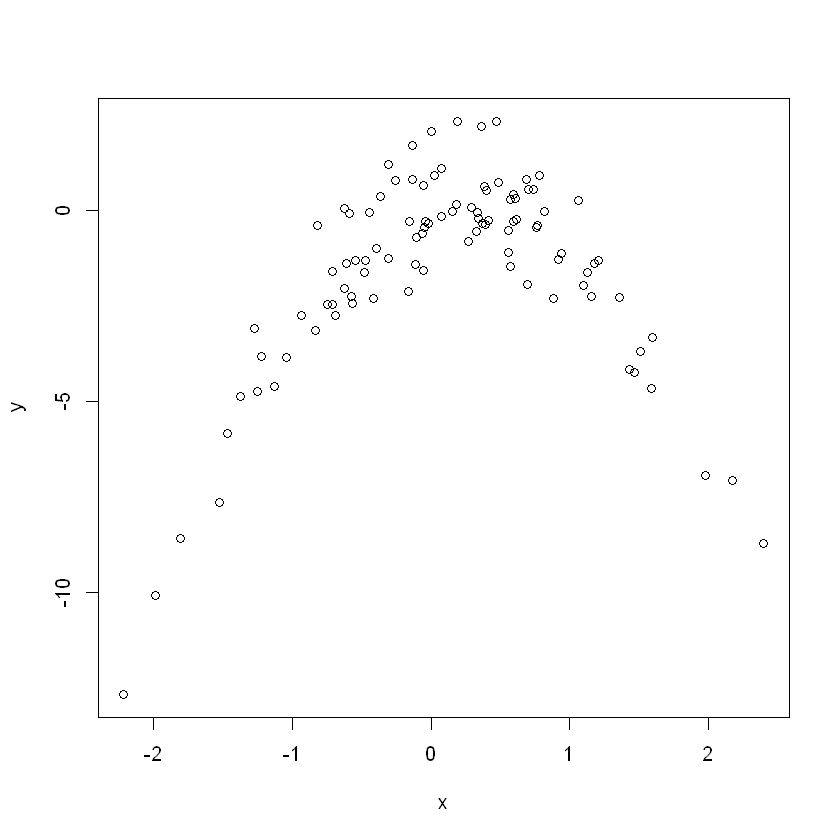

In [4]:
plot(x,y)

b) We have a bell curve depicting the normal distribution

##### c) 

In [27]:
set.seed(123)
library(boot)
data = data.frame(x,y)

In [28]:
linear = glm(y~poly(x,1), data = data, family = gaussian)
cv.glm(data, linear)$delta[1]

[1] 7.288162

In [29]:
quadratic = glm(y~poly(x,2), data = data, family = gaussian)
cv.glm(data, quadratic)$delta[1]

[1] 0.9374236

In [30]:
cubic = glm(y~poly(x, 3), data = data, family = gaussian)
cv.glm(data, cubic)$delta[1]

[1] 0.9566218

In [31]:
quartic = glm(y~poly(x, 4), data = data, family = gaussian)
cv.glm(data, quartic)$delta[1]

[1] 0.9539049

##### d)

In [32]:
set.seed(321)
linear2 = glm(y~poly(x,1), data = data, family = gaussian)
cv.glm(data, linear)$delta[1]

quadratic2 = glm(y~poly(x,2), data = data, family = gaussian)
cv.glm(data, quadratic)$delta[1]

cubic2 = glm(y~poly(x, 3), data = data, family = gaussian)
cv.glm(data, cubic)$delta[1]

quartic2 = glm(y~poly(x, 4), data = data, family = gaussian)
cv.glm(data, quartic)$delta[1]

[1] 7.288162

[1] 0.9374236

[1] 0.9566218

[1] 0.9539049

Results are exactly the same since LOOCV use all train/validation splits.

###### e)

The quadratic model has the smallest LOOCV errors. And it seems fair since it is not unerfitting and not overfitting.
For example higher order polynomial means more flexible model which will fit your training data better but maybe too much better and that would lead to overfitting. 

###### f) 

In [42]:
summary(linear)
summary(quadratic)
summary(cubic)
summary(quartic)



Call:
glm(formula = y ~ poly(x, 1), family = gaussian, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.550      0.260  -5.961 3.95e-08 ***
poly(x, 1)     6.189      2.600   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 2), family = gaussian, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 3), family = gaussian, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 4), family = gaussian, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


Only quadratics is statistically significant since its p-value is below 5%

### Exercice 1 (p.259, Chap.6)

1. We perform best subset, forward stepwise, and backward stepwise
selection on a single data set. For each approach, we obtain p + 1
models, containing 0, 1, 2,...,p predictors. Explain your answers:


a) Which of the three models with k predictors has the smallest
training RSS?

It's the best subset selection since its looks for all possible models with k predictors with choosing the smallest RSS
Otherwises the others models will have lower RSS with starting with k-1 predictors or starting with k+1 predictors.

b) Which of the three models with k predictors has the smallest
test RSS?

We can not say which model is the best since all the model car perform well on having the samallest test RSS 

c) TRUE or FALSE

i. TRUE since the model with k+1 predictors is obtained by adding 1 predictors to the model with k predictors 


ii. TRUE since the model with k predictors is obtained by remowing one predictors from the model with k+1 predictors 

iii. FALSE no link between model obtained from forward and backward selection

iv. same as above

v. FALSE 

### Exercice 9 (p.263, Chap.6)

a) split the data

In [67]:
library(ISLR)
set.seed(123)
train = sample(1:dim(College)[1], dim(College)[1]/2)
test = -train
college.train = College[train,]
college.test = College[test, ]

b) fit linear model 

In [70]:
fit.linear = lm(Apps ~., data = college.train)
pred.linear = predict(fit.linear, college.test)

mean((pred.linear - college.test$Apps)^2)

[1] 1373995

c) fit ridge regression with lambda chosen by CV

In [75]:
x = model.matrix(Apps ~ ., data = college.train)
y = model.matrix(Apps ~ ., data = college.test)

In [78]:
library(glmnet)
grid=10^seq(10,-2, length =100)

ridge_model = glmnet(x, college.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
cv_ridge = cv.glmnet(x, college.train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)

best_lambda = cv_ridge$lambda.min
best_lambda


[1] 24.77076

In [82]:
prediction = predict(ridge_model, s = best_lambda, newx = y)
mean((prediction - college.test$Apps)^2)

[1] 1450112

Test MSE seems to be higher for ridge regression than for least square

d) fit a lasso regression with lambda chosen by CV.

In [87]:
fit.lasso = glmnet(x, college.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso = cv.glmnet(x, college.train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
best_lambda_lasso = cv.lasso$lambda.min
best_lambda_lasso

[1] 14.17474

In [92]:
prediction_lasso = predict(fit.lasso, s = best_lambda_lasso, newx = y)
mean((prediction_lasso - college.test$Apps)^2)

[1] 1390343

In [ ]:
#let's find the non-zero coefficient estimate


In [93]:
predict(fit.lasso, s = best_lambda_lasso, type = "coefficients")


19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -316.53475433
(Intercept)    .         
PrivateYes  -742.79283443
Accept         1.33240290
Enroll         .         
Top10perc     30.22256705
Top25perc     -2.59817141
F.Undergrad    .         
P.Undergrad    .         
Outstate      -0.03817795
Room.Board     0.14352342
Books          .         
Personal      -0.05965967
PhD           -4.63022767
Terminal      -5.87468305
S.F.Ratio      .         
perc.alumni   -7.90012312
Expend         0.07900696
Grad.Rate      8.82858013

e) fit a PCR model with number of component chosen by CV

In [96]:
install.packages("pls")
library(pls)
#fit PCR model with Cross validation to choose number of component
fit.pcr = pcr(Apps ~., data = college.train, scale = TRUE, validation = "CV" )


Warning message:
"package 'pls' is in use and will not be installed"


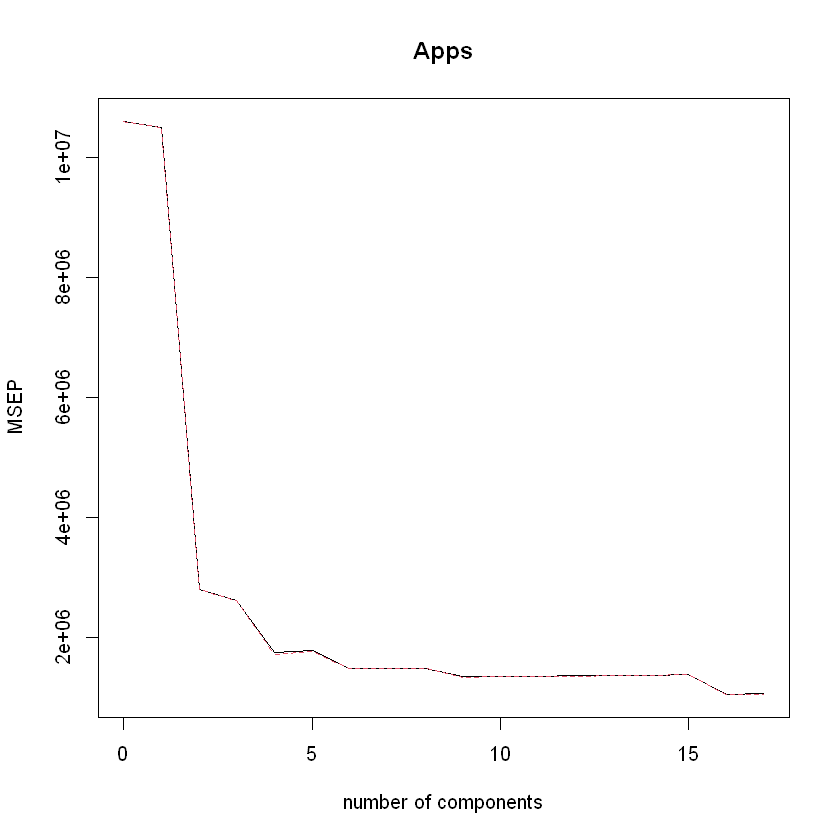

In [97]:
#plot the Mean squared error prediction 
validationplot(fit.pcr, val.type = "MSEP")

In [100]:
pred.pcr = predict(fit.pcr, college.test, ncom = 10)
mean((pred.pcr - college.test$Apps)^2)

[1] 2887472

Mean squared erros is also higher for PCR than for least square regression 

###### f) Fit pls regression with M number of component chosen by cross validation 

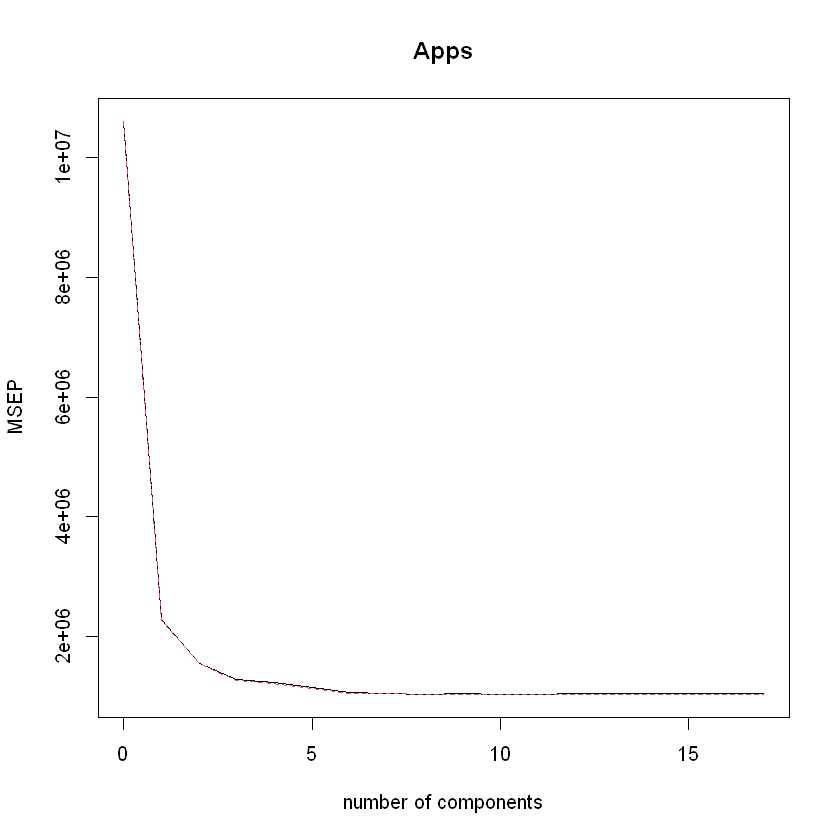

In [102]:
#fit partial least square regression
fit.pls <- plsr(Apps ~., data = college.train, scale = TRUE, validation = "CV")
validationplot(fit.pls, val.type = "MSEP")

In [103]:
pred.pls = predict(fit.pls, college.test, ncomp = 10)
mean((pred.pls - college.test$Apps)^2)

[1] 1384151

MSE is still higher for PLS than for least square regression 

###### g) Compare the results

We can see that there is a huge difference between those models. And the model with the lowest MSE remain the linear model. 

### Exercice 9 (p.299, Chap.7) 

##### a) fit a cubic polynomial regression 

In [130]:
cubic_regression <-  lm(nox ~ poly(dis, 3))
summary(cubic_regression)


Call:
lm(formula = nox ~ poly(dis, 3))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


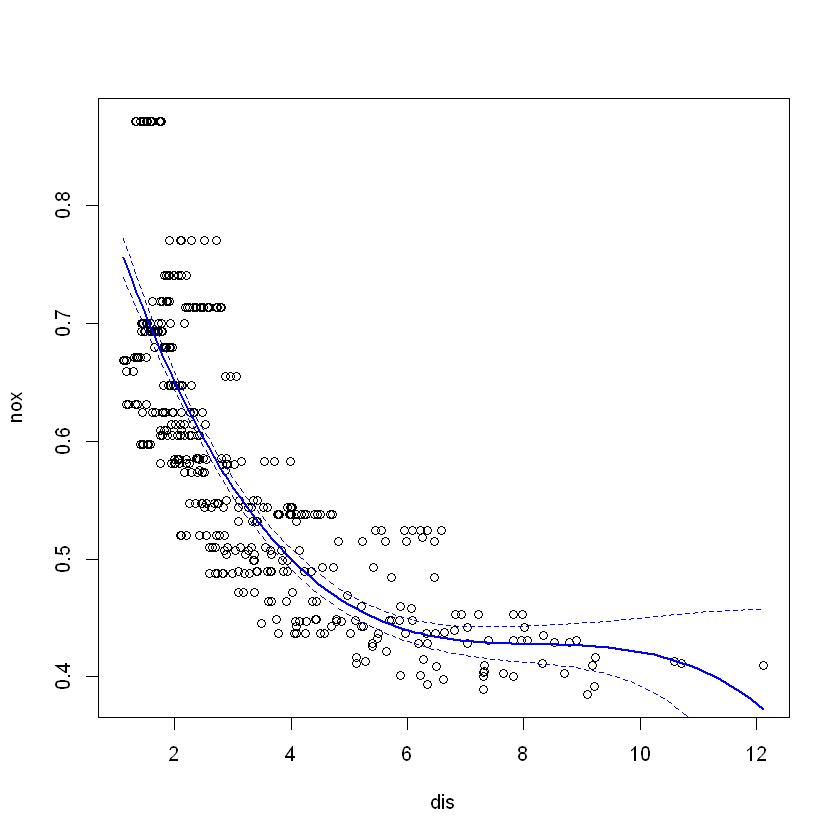

In [136]:
#get range of the axis of the line 
dislim <-  range(dis)

#create a grid of x axis point that we will predict 
dis.grid <-  seq(from = dislim[1], to = dislim[2], length.out = 100)

lm.pred <-  predict(m1, list(dis = dis.grid), se = TRUE)

par(mfrow = c(1,1))

#plot the regression and polynomial fit
plot(nox ~ dis)
lines(x = dis.grid, y = lm.pred$fit, col = "blue", lwd = 2)
matlines(x = dis.grid, y = cbind(lm.pred$fit + 2* lm.pred$se.fit,
                                 lm.pred$fit - 2* lm.pred$se.fit) 
         , col = "blue", lwd = 1.5, lty = "dashed")

###### b) Report RSS for different polynomial degrees (1 to 10)

In [137]:
# create an empty list
train.rss <-  NA

for (i in 1:10) {
  polynomial <-  lm(nox ~ poly(dis, i))
  train.rss[i] <-  sum(polynomial$residuals^2)
}

# show model fit in training set
train.rss

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

We can observe that RSS decrease as the degree of Polynomial increase

###### (c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

###### (d) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.


In [140]:
library(splines)
spline_regression = lm(nox ~ bs(dis, knots = c(3,6,9)))
summary(spline_regression)


Call:
lm(formula = nox ~ bs(dis, knots = c(3, 6, 9)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.132134 -0.039466 -0.009042  0.025344  0.187258 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.709144   0.016099  44.049  < 2e-16 ***
bs(dis, knots = c(3, 6, 9))1  0.006631   0.025467   0.260    0.795    
bs(dis, knots = c(3, 6, 9))2 -0.258296   0.017759 -14.544  < 2e-16 ***
bs(dis, knots = c(3, 6, 9))3 -0.233326   0.027248  -8.563  < 2e-16 ***
bs(dis, knots = c(3, 6, 9))4 -0.336530   0.032140 -10.471  < 2e-16 ***
bs(dis, knots = c(3, 6, 9))5 -0.269575   0.058799  -4.585 5.75e-06 ***
bs(dis, knots = c(3, 6, 9))6 -0.303386   0.062631  -4.844 1.70e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0612 on 499 degrees of freedom
Multiple R-squared:  0.7244,	Adjusted R-squared:  0.7211 
F-statistic: 218.6 on 6 and 499 DF,  p-value: < 2.2e-16


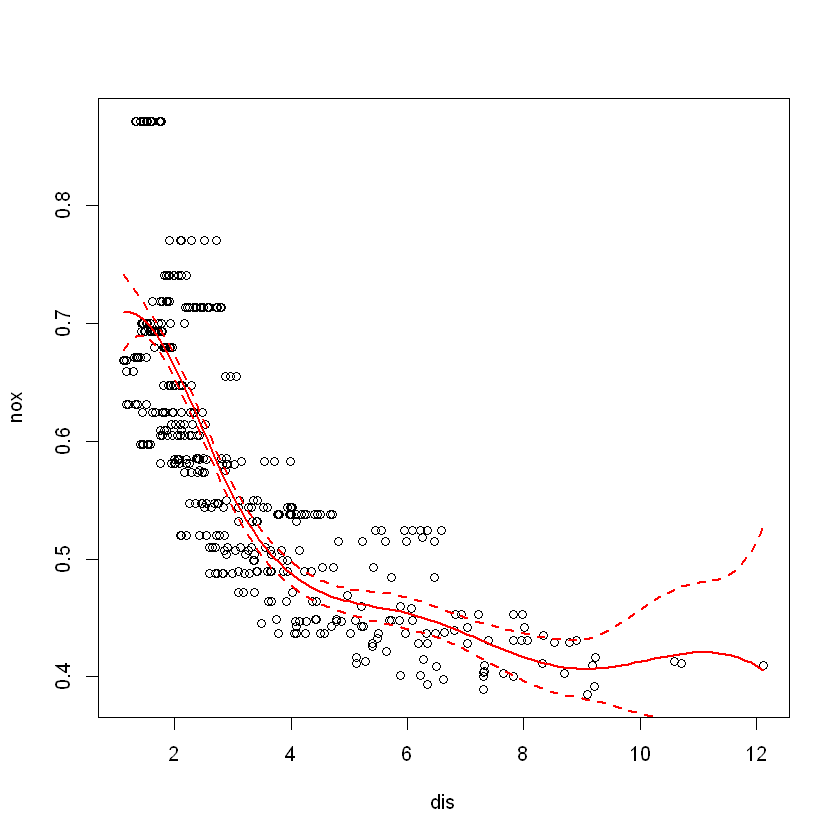

In [146]:
preds = predict(spline_regression, list(dis = dis.grid), se = TRUE)
par(mfrow = c(1,1))
plot(nox ~ dis)

matlines( dis.grid,
          cbind( preds$fit,
                 preds$fit + 2* preds$se.fit,
                 preds$fit - 2* preds$se.fit),
          col = "red", lwd = 2, lty = c("solid", "dashed", "dashed"))

We choose 3,6 and 9 knots since there is 12 unity in dis and we divide it into 4 interval. The splines seems to fit well the data, until dis > 8 when there is very few observation and data is underfitting..

###### e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

In [150]:
list = NA

#we fit regression splines for range from 2 to 20 degree of freedom
for (i in 2:20){
    lm.fit = lm(nox ~ bs(dis, df = i))
    list[i] = sum(lm.fit$residuals^2)
}

list[-c(1,2)]

Warning message in bs(dis, df = i):
"'df' was too small; have used 3"


[1] 1.934107 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535
 [9] 1.796992 1.788999 1.782350 1.781838 1.782798 1.783546 1.779789 1.775838
[17] 1.774487 1.776727

We can observe that RSS slightly decrease until 12 degree of freedom and then increase

### Exercice 10 (p.300, Chap.7)

In [156]:
#load and attach the data
library(leaps)
attach(College)
# split the data
train <- sample(length(Outstate), length(Outstate)/2)
test = -train

The following objects are masked from College (pos = 3):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc


The following objects are masked from College (pos = 4):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc


The following objects are masked from College (pos = 5):

    Accept, Apps, Books, Enroll, Expend, F.Undergrad, Grad.Rate,
    Outstate, P.Undergrad, perc.alumni, Personal, PhD, Private,
    Room.Board, S.F.Ratio, Terminal, Top10perc, Top25perc




In [168]:
college.train = College[train,]
college.test = College[test,]

#forward selection
forward_regression = regsubsets(Outstate ~ ., data = college.train, nvmax = 17, method = "forward" )
regression_summary = summary(forward_regression)
regression_summary

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = college.train, nvmax = 17, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: forward
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  "*"        " "  " "    " "    " "      

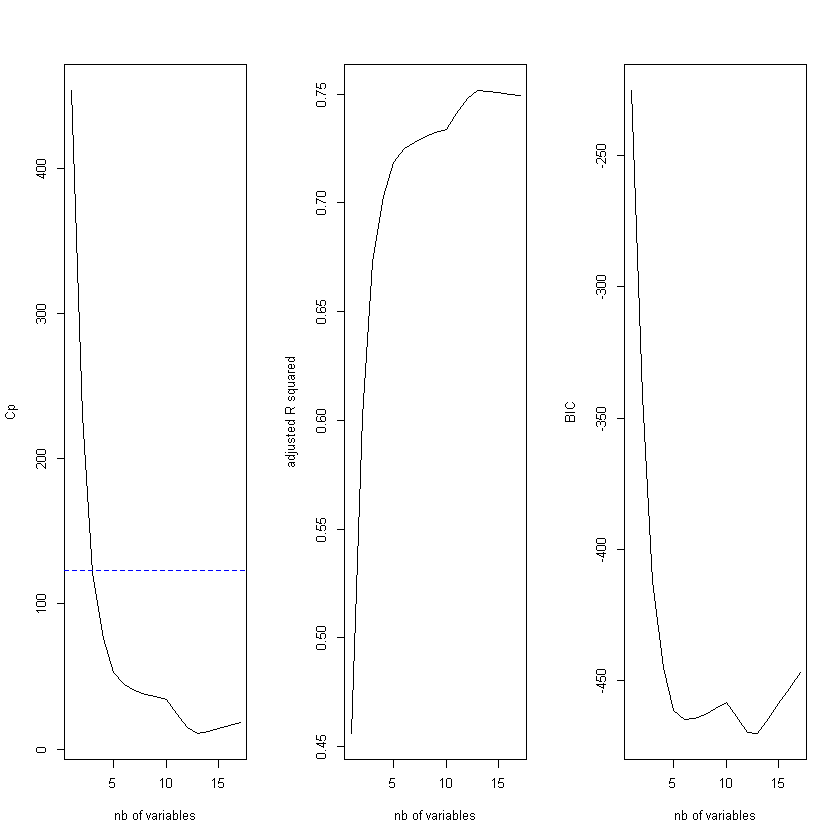

In [194]:
#split 3 plots into 3 columns 
par(mfrow= c(1,3))

#plot Cp
plot(regression_summary$cp, xlab = "nb of variables", ylab = "Cp", type = 'l')
min_cp = min(regression_summary$cp)
std_cp = sd(regression_summary$cp)
abline(h=min_cp + std_cp, col = 'blue', lty = 2)

#plot adj R2
plot(regression_summary$adjr2, xlab = "nb of variables", ylab = "adjusted R squared", type = 'l')

#plot BIC
plot(regression_summary$bic, xlab="nb of variables", ylab = "BIC", type = 'l')

We choose p = 6 predictors according to the graphs above

In [196]:
coefficient = regsubsets(Outstate ~., method = "forward", data = College)
coef = coef(coefficient, id = 4)
names(coef)

[1] "(Intercept)" "PrivateYes"  "Room.Board"  "perc.alumni" "Expend"

The 6 variables above would be the 6 predictors for the forward selection model

###### (b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [199]:
install.packages("gam")
library(gam)

package 'gam' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rcolombier\AppData\Local\Temp\Rtmp0KNsJs\downloaded_packages


Loading required package: foreach

Loaded gam 1.20




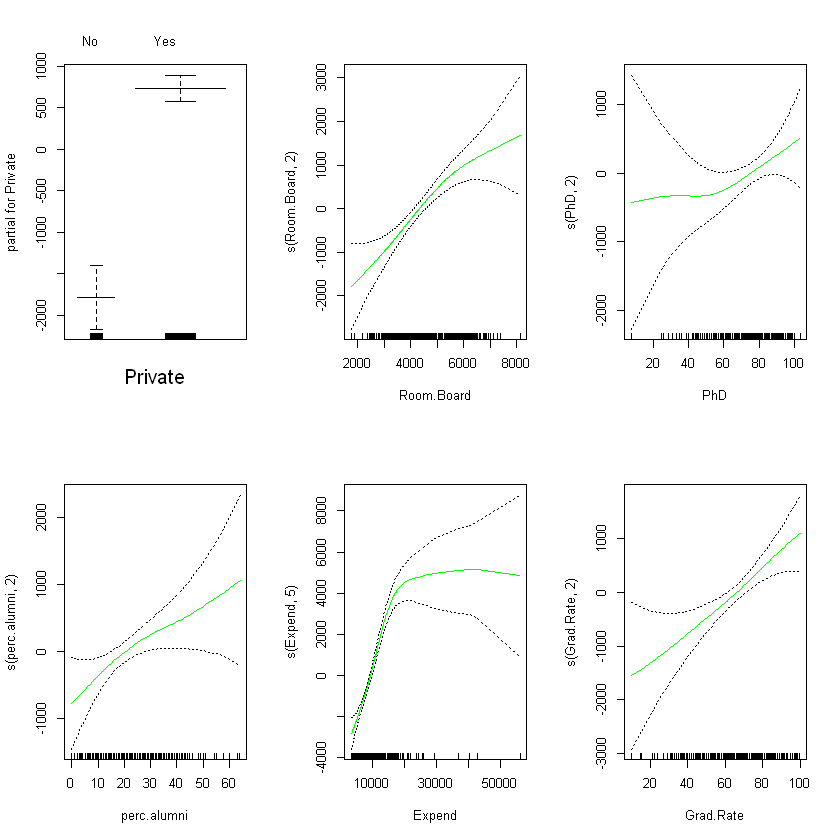

In [205]:
fit.gam = gam(Outstate ~ Private + s(Room.Board, 2) + 
             s(PhD, 2) + s(perc.alumni,2) +
             s(Expend, 5) + s(Grad.Rate, 2), data = college.train)

par(mfrow = c(2,3))
plot(fit.gam, col = "green", se = TRUE)

###### c) Evaluate the model obtained on the test set, and explain the results obtained.

In [214]:
prediction = predict(fit.gam, college.test)
error = mean((college.test$Outstate - prediction)^2)
error

[1] 3268279